In [ ]:
import pandas as pd
import numpy as np
import keras
from keras import layers

Upload the labels.csv and processed_counts.csv files to colab or your local workspace.

**Copied from Part 1:**
This data associates a cell barcode, such as "AAAGCCTGGCTAAC-1", to a certain cell type label, such as "CD14+ Monocyte". For each cell barcode, there are also log RNA seq counts of 765 different genes, such as HES4.

label.csv stores the association between a cell barcode and a cell type label.

processed_counts.csv stores the normalized log read counts for each cell, where each row represents a single cell, and each column represents a gene.

Read in data

One-hot encode the cell-type.

Shuffle your data. Make sure your labels and the counts are shuffled together.

Split into train and test sets (80:20 split)

In [ ]:
categories = df['bulk_labels'].unique()
print(categories)

#one-hot encoding
y = np.zeros((len(df), len(categories)))
for i in range(len(df)):
  cell_type = df.iloc[i]['bulk_labels']
  pos = np.where(categories == cell_type)[0]
  y[i, pos] = 1

#remove label when processing input data
X = df.drop('bulk_labels', axis=1).values

#shufle and 80:20 split
np.random.seed(100)
permutation = np.random.permutation(len(X))
X, y = X[permutation], y[permutation]

X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_test, y_test = X[int(len(X)*0.8):], y[int(len(y)*0.8):]

['CD14+ Monocyte' 'Dendritic' 'CD56+ NK' 'CD4+/CD25 T Reg' 'CD19+ B'
 'CD8+ Cytotoxic T' 'CD4+/CD45RO+ Memory' 'CD8+/CD45RA+ Naive Cytotoxic'
 'CD4+/CD45RA+/CD25- Naive T' 'CD34+']


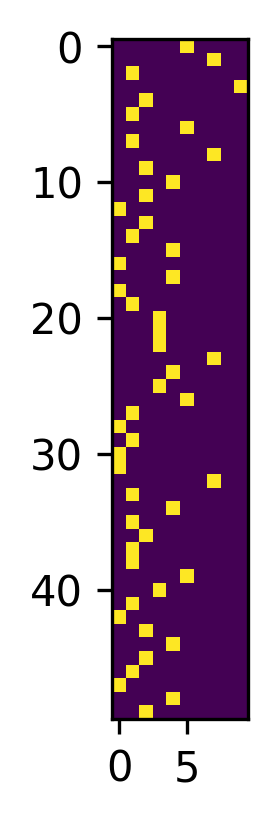

In [ ]:
#Visualize the One-hot encoded Prediction Labels
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3), dpi=300)
plt.imshow(y_train[:50])

Apply classification algorithms to the training data, tune on validation data (if present), and evaluate on test data.

You can also apply classification downstream of autoencoder latent space representation.

FFNN hints: 
Use softmax at the end, reLU for the rest
Add layers until desired loss
Categorical cross-entropy for loss func
Add dropout layers to avoid overfitting

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 765), (140, 765), (560, 10), (140, 10))

# 1) Feedforward Neural Network Classifier

In [ ]:
model = keras.Sequential()

# Added Dense and Dropout layers


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 765)               0         
                                                                 
 dense (Dense)               (None, 500)               383000    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               64128     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 448,418
Trainable params: 448,418
Non-trai

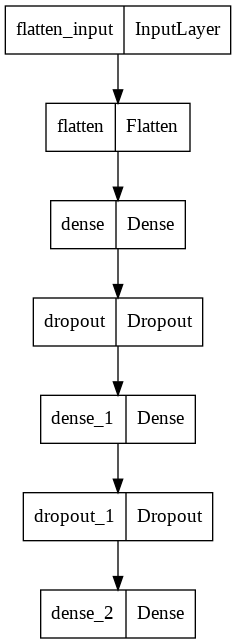

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
model.summary()
keras.utils.plot_model(model)

In [ ]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 6ms/step - loss: 2.1174 - accuracy: 0.4018
Epoch 2/30
18/18 [==============================] - 0s 6ms/step - loss: 0.9339 - accuracy: 0.7054
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.7821
Epoch 4/30
18/18 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.8714
Epoch 5/30
18/18 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8821
Epoch 6/30
18/18 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.9143
Epoch 7/30
18/18 [==============================] - 0s 5ms/step - loss: 0.1962 - accuracy: 0.9482
Epoch 8/30
18/18 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.9411
Epoch 9/30
18/18 [==============================] - 0s 6ms/step - loss: 0.1529 - accuracy: 0.9500
Epoch 10/30
18/18 [==============================] - 0s 5ms/step - loss: 0.1067 - accuracy: 0.9679
Epoch 11/30
18/18 [

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print("These are the results from the Feedforward Neural Network classifier")
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 0.8231 - accuracy: 0.8286 - 182ms/epoch - 36ms/step
These are the results from the Feedforward Neural Network classifier

Test loss: 0.8230774402618408

Test accuracy: 0.8285714387893677


# 2) Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
#created decision tree
print("These are the results from Decision Tree Classifier")
print("Here are the scores: ", scores) 
print("Here is the mean score: ", scores.mean())

These are the results from Decision Tree Classifier
Here are the scores:  [0.65714286 0.63571429 0.73571429 0.73571429 0.68571429]
Here is the mean score:  0.6900000000000001


[Text(0.5799180327868853, 0.95, 'X[641] <= -0.72\ngini = 0.162\nsamples = 560\nvalue = [[461, 99]\n[370, 190]\n[535, 25]\n[502, 58]\n[480, 80]\n[520, 40]\n[542, 18]\n[526, 34]\n[554, 6]\n[550, 10]]'),
 Text(0.4098360655737705, 0.85, 'X[709] <= 0.228\ngini = 0.163\nsamples = 269\nvalue = [[268, 1]\n[269, 0]\n[244, 25]\n[211, 58]\n[189, 80]\n[230, 39]\n[252, 17]\n[235, 34]\n[263, 6]\n[260, 9]]'),
 Text(0.29508196721311475, 0.75, 'X[724] <= 0.093\ngini = 0.161\nsamples = 183\nvalue = [[182, 1]\n[183, 0]\n[158, 25]\n[127, 56]\n[181, 2]\n[147, 36]\n[166, 17]\n[151, 32]\n[178, 5]\n[174, 9]]'),
 Text(0.16393442622950818, 0.65, 'X[104] <= 0.97\ngini = 0.142\nsamples = 119\nvalue = [[118, 1]\n[119, 0]\n[119, 0]\n[64, 55]\n[117, 2]\n[113, 6]\n[103, 16]\n[93, 26]\n[115, 4]\n[110, 9]]'),
 Text(0.09836065573770492, 0.55, 'X[17] <= -0.319\ngini = 0.13\nsamples = 98\nvalue = [[97, 1]\n[98, 0]\n[98, 0]\n[44, 54]\n[96, 2]\n[94, 4]\n[83, 15]\n[88, 10]\n[95, 3]\n[89, 9]]'),
 Text(0.06557377049180328, 0.4

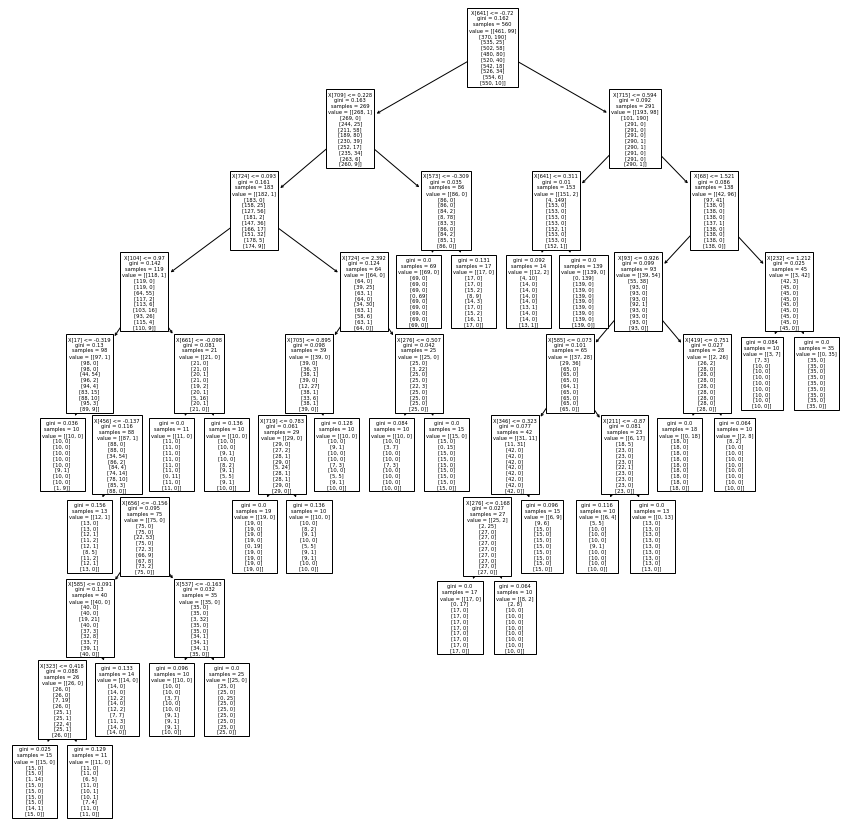

In [ ]:
#visualized the tree
plt.figure(figsize=(15,15))

# 3) Ensemble methods: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# created the random forest classifer
print("These are the results from the Random Forest Classifier")
print("Here are the scores: ", scores) 
print("Here is the mean score: ", scores.mean())

These are the results from the Random Forest Classifier
Here are the scores:  [0.55714286 0.64285714 0.63571429 0.63571429 0.66428571]
Here is the mean score:  0.6271428571428571


[Text(0.8576328210663378, 0.9736842105263158, 'X[236] <= 0.815\ngini = 0.164\nsamples = 338\nvalue = [[463, 97]\n[382, 178]\n[531, 29]\n[509, 51]\n[472, 88]\n[516, 44]\n[543, 17]\n[521, 39]\n[553, 7]\n[550, 10]]'),
 Text(0.750353361430921, 0.9210526315789473, 'X[680] <= 1.07\ngini = 0.171\nsamples = 263\nvalue = [[348, 96]\n[379, 65]\n[415, 29]\n[393, 51]\n[358, 86]\n[400, 44]\n[427, 17]\n[405, 39]\n[437, 7]\n[434, 10]]'),
 Text(0.6037768983004386, 0.868421052631579, 'X[421] <= -0.042\ngini = 0.173\nsamples = 225\nvalue = [[333, 48]\n[331, 50]\n[352, 29]\n[330, 51]\n[295, 86]\n[337, 44]\n[364, 17]\n[342, 39]\n[374, 7]\n[371, 10]]'),
 Text(0.4575537966008772, 0.8157894736842105, 'X[193] <= 0.111\ngini = 0.168\nsamples = 177\nvalue = [[297, 3]\n[280, 20]\n[271, 29]\n[249, 51]\n[217, 83]\n[259, 41]\n[283, 17]\n[261, 39]\n[293, 7]\n[290, 10]]'),
 Text(0.3526075932017544, 0.7631578947368421, 'X[332] <= 0.995\ngini = 0.154\nsamples = 122\nvalue = [[208, 3]\n[191, 20]\n[207, 4]\n[166, 45]\n[1

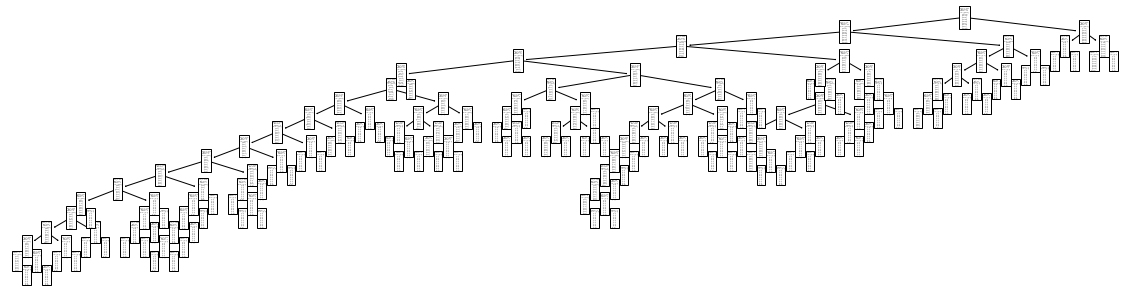

In [ ]:
from sklearn.tree import plot_tree
# plotted the tree
fig = plt.figure(figsize=(20, 5))

# End of part 2